In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

2025-10-30 12:33:29.545992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761827609.818416      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761827609.895114      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = []
paths = []
result = []
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

for r, d, f in os.walk(r'/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r , file))
for path in paths:
    img = Image.open(path)
    img = img.resize((128 , 128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
 



In [4]:
paths = []
no_path = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'
for r, d, f in os.walk(r'/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r , file))
for path in paths:
    img = Image.open(path)
    img = img.resize((128 , 128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
result = np.vstack(result)
data.shape

(139, 128, 128, 3)

## SPLITTING THE DATA INTO TRAINING AND TESTING

In [6]:
x_train , x_test , y_train , y_test = train_test_split(data , result , test_size = 0.2 , shuffle = True , random_state = 0)

In [7]:
print(f'No of images in training data:{len(x_train)}')

No of images in training data:111


In [8]:
print(f'No of images in training data:{len(x_test)}')

No of images in training data:28


## BUILDING THE AI MODEL

In [9]:
model = Sequential()

model.add(Conv2D(32 , kernel_size = (2,2) , input_shape=(128,128,3) , padding = 'Same'))
model.add(Conv2D(32 , kernel_size = (2,2) , activation = 'relu' , padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2) , activation = 'relu' , padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2) , activation = 'relu' , padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2) , strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2 , activation = 'softmax'))

model.compile(loss = "categorical_crossentropy" , optimizer = 'Adamax')
print(model.summary())
          


          
          

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-30 12:33:49.457652: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [10]:
len(y_train)

111

## MODEL EVALUATION

In [11]:
history  = model.fit(x_train , y_train , epochs = 30 , batch_size = 40 , verbose = 1 , validation_data = (x_test , y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 46.6377 - val_loss: 21.8571
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 16.6153 - val_loss: 18.3009
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 9.0091 - val_loss: 12.9951
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 5.9289 - val_loss: 8.9403
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 2.5329 - val_loss: 6.6518
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 1.3857 - val_loss: 6.0205
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.8707 - val_loss: 6.3074
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.3761 - val_loss: 7.2553
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.3788 - val_loss: 7.0807
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 1.1584 - val_loss: 5.0062
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 0.1184 - val_loss: 3.4795
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.0763 - val_loss: 2.3945
Epoch 13/30
3/3 ━━

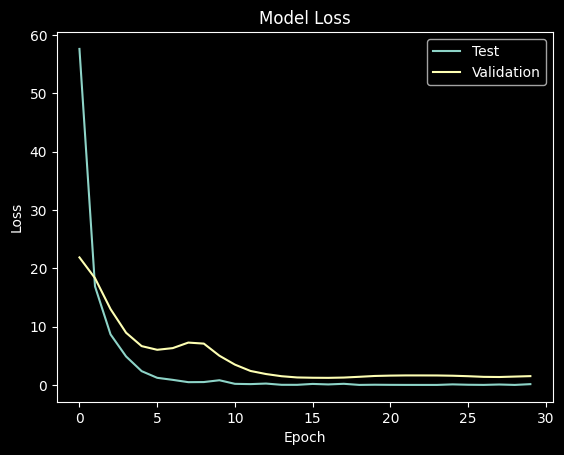

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

## TESTING THE MODEL

In [13]:
def names(number):
    if number == 0:
        return "It's a Tumor"
    else:
        return "No, Its not a Tumor"

99.97963309288025% Confidence This Is No, Its not a Tumor


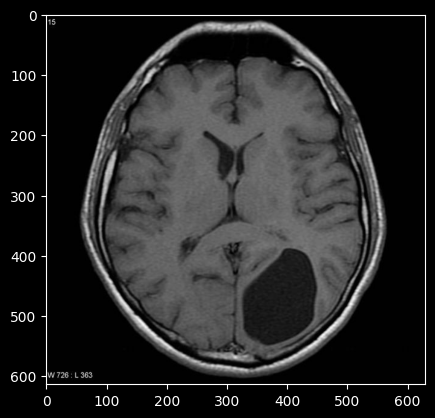

In [14]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N11.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))